In [3]:
pip install unidecode

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
from pandas import read_excel
import numpy as np 
import re 
from re import sub
import multiprocessing
from unidecode import unidecode
import os 
from time import time 
import tensorflow as tf 
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Activation,Embedding, Flatten,Bidirectional,MaxPooling2D, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD, Adam
from keras import regularizers
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import pad_sequences
#from keras.utils.np_utils import to_categorical
from keras.utils import to_categorical
import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split




#clean unwwanted thing from dataset 

In [5]:
def text_to_word_list(text):
    text=text.split()
    return text

def replace_strings(text):
    emoji_pattern=re.compile("["u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F""]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)
    return text


# remove punctuations

def remove_punctuations(my_str):
        # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰⚽️✌�￰৷￰'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out




In [6]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install xlrd==1.2.0

Note: you may need to restart the kernel to use updated packages.


In [8]:
df=pd.read_excel('predicted_unsupervised_sentiment.xlsx')
display(df)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,sentence,sentiment
0,0,NaN,NaN,ওয়ও আমি গর্বিত বাঙ্গালি,1
1,1,NaN,NaN,বাংলাদেশ এর কিছু মানুষ নিজে কিছু করতে পারবেনা ...,0
2,2,NaN,NaN,রামোসের ঘুম আসে না,0
3,3,NaN,NaN,কোহলির প্রতি শ্রদ্ধা হারিয়ে ফেলছি,1
4,4,NaN,NaN,থ্যাঙ্ক ইউ মাছরাঙ্গা টেলিভিশনকিন্তু ছাপোষা আন্...,0
...,...,...,...,...,...
6647,6647,NaN,NaN,আমি কখনো আশা করিনি যে আমি আমার স্বপ্নের প্রিয় ...,1
6648,6648,NaN,NaN,মিডিয়া লিটনকে একজন খারাপ মানুষ হিসেবে প্রতিষ্ঠ...,0
6649,6649,NaN,NaN,বাংলাদেশের জন্ম কিংবা তার পূর্বের ইতিহাস অনেকে...,0
6650,6650,NaN,NaN,আপনারা সিম নিবন্দন করালেন বাংলাদেশে অপরাধ কমবে...,0


<Axes: xlabel='sentiment', ylabel='count'>

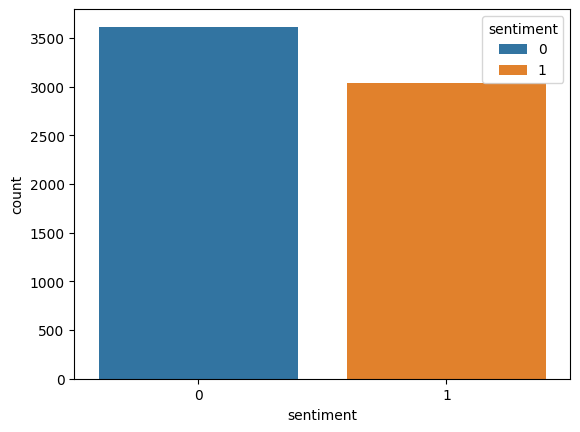

In [9]:
sns.countplot(x ='sentiment', data = df, hue="sentiment")

In [10]:
df["sentence"]= df.sentence.apply(lambda x: preprocessing(str(x)))

In [11]:
df.reset_index(drop=True,inplace=True)

In [12]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,sentence,sentiment
0,0,NaN,NaN,ওয়ও আমি গর্বিত বাঙ্গালি,1
1,1,NaN,NaN,বাংলাদেশ এর কিছু মানুষ নিজে কিছু করতে পারবেনা ...,0
2,2,NaN,NaN,রামোসের ঘুম আসে না,0
3,3,NaN,NaN,কোহলির প্রতি শ্রদ্ধা হারিয়ে ফেলছি,1
4,4,NaN,NaN,থ্যাঙ্ক ইউ মাছরাঙ্গা টেলিভিশনকিন্তু ছাপোষা আন্...,0
...,...,...,...,...,...
6647,6647,NaN,NaN,আমি কখনো আশা করিনি যে আমি আমার স্বপ্নের প্রিয় ...,1
6648,6648,NaN,NaN,মিডিয়া লিটনকে একজন খারাপ মানুষ হিসেবে প্রতিষ্ঠ...,0
6649,6649,NaN,NaN,বাংলাদেশের জন্ম কিংবা তার পূর্বের ইতিহাস অনেকে...,0
6650,6650,NaN,NaN,আপনারা সিম নিবন্দন করালেন বাংলাদেশে অপরাধ কমবে...,0


In [42]:
df['sentiment'].value_counts()

sentiment
0    3615
1    3037
Name: count, dtype: int64

In [13]:
train1, test1= train_test_split(df,random_state=42,test_size=0.2)
training_sentences=[]
testing_sentences=[]



train_sentences=train1['sentence'].values
train_labels=train1['sentiment'].values

for i in range(train_sentences.shape[0]):
    x=str(train_sentences[i])
    training_sentences.append(x)
training_sentences=np.array(training_sentences)



test_sentences=test1['sentence'].values
test_labels=test1['sentiment'].values

for i in range(test_sentences.shape[0]):
    x=str(test_sentences[i])
    testing_sentences.append(x)

testing_sentences=np.array(testing_sentences)

train_labels=tf.keras.utils.to_categorical(train_labels)

test_labels=tf.keras.utils.to_categorical(test_labels)

print("Training Set Length: "+str(len(train1)))
print("Testing Set Length: "+str(len(test1)))
print("training_sentences shape: "+str(training_sentences.shape))
print("testing_sentences shape: "+str(testing_sentences.shape))
print("train_labels shape: "+str(train_labels.shape))
print("test_labels shape: "+str(test_labels.shape))




Training Set Length: 5321
Testing Set Length: 1331
training_sentences shape: (5321,)
testing_sentences shape: (1331,)
train_labels shape: (5321, 2)
test_labels shape: (1331, 2)


In [14]:
print(train_sentences)

['তার কত টাকা অথচ আমার সাভাবিক ভাবে বেচে থাকার টাকা নাই বললেই চলে সত্যি পৃথীবি টা অদভুত'
 'মূলত তাঁর প্রয়াসেই বাংলাদেশ ক্রিকেটে এতকিছু পেয়েছে তাঁর হাত ধরেই বাংলাদেশ একদিন স্বপ্নের সোনালি সিঁড়ি বেয়ে বিশ্বকে দেখিয়ে বিশ্বকাপ নিয়ে আসবে আর সারা বিশ্ব সাকিবের নামে বিজয়ের স্লোগান দিবে'
 'কারাগারে বিলাসী জীবন কাটছিল মুফতি হান্নানের' ...
 'খারাপ মানুষের অত্যাচারের জন্য এই পৃথিবী ধ্বংস হচ্ছে না এই পৃথিবী ধ্বংস হচ্ছে ভাল মানুষ গুলোর নীরবতার জন্য'
 'হ্যাকার দের ঈদ শুরু হয়ে যাবে'
 'গ্রামীণ টেলিকম তার পল্লী ফোন কর্মসূচির মাধ্যমে গ্রামের দরিদ্র নারী উদ্যোক্তাদের গ্রামাঞ্চলে টেলিফোন সেবা বিক্রির সুবিধা দিয়ে থাকে গ্রামীণ টেলিকমই পৃথিবীর ইতিহাসে প্রথম দরিদ্র মানুষের কাছে বিশেষ করে নারীদের কাছে ও গ্রামাঞ্চলে টেলিফোন সেবা পৌঁছে দেওয়ার নজির স্থাপন করেছে']


In [15]:
print(training_sentences[1])
print(train_labels[0])

মূলত তাঁর প্রয়াসেই বাংলাদেশ ক্রিকেটে এতকিছু পেয়েছে তাঁর হাত ধরেই বাংলাদেশ একদিন স্বপ্নের সোনালি সিঁড়ি বেয়ে বিশ্বকে দেখিয়ে বিশ্বকাপ নিয়ে আসবে আর সারা বিশ্ব সাকিবের নামে বিজয়ের স্লোগান দিবে
[1. 0.]


In [16]:
vocab_size=25000
embedding_dim=300
max_length=100
trunc_type='post'
oov_tok='<OOV>'

In [17]:
print(training_sentences.shape)
print(train_labels.shape)

(5321,)
(5321, 2)


In [18]:
tokenizer=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index=tokenizer.word_index
print(len(word_index))
print("word index length : "+str(len(tokenizer.word_index)))
sequences=tokenizer.texts_to_sequences(training_sentences)
padded=pad_sequences(sequences,maxlen=max_length,truncating=trunc_type)


test_sequences= tokenizer.texts_to_sequences(testing_sentences)
testing_padded=pad_sequences(test_sequences, maxlen=max_length)

18442
word index length : 18442


In [19]:
print("Sentence :--> \n")
print(training_sentences[2]+"\n")
print("Sentence Tokenized and Converted into Sequence :--> \n")
print(str(sequences[2])+"\n")
print("After Padding the Sequence with padding length 100 :--> \n")
print(padded[2])

Sentence :--> 

কারাগারে বিলাসী জীবন কাটছিল মুফতি হান্নানের

Sentence Tokenized and Converted into Sequence :--> 

[6842, 6843, 235, 6844, 6845, 4363]

After Padding the Sequence with padding length 100 :--> 

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0 6842 6843  235 6844
 6845 4363]


In [20]:
print("Padded shape(training) :" + str(padded.shape))
print("Padded shape(testing) :" + str(testing_padded.shape))

Padded shape(training) :(5321, 100)
Padded shape(testing) :(1331, 100)


In [21]:
print(padded)

[[   0    0    0 ... 6838   95 6839]
 [   0    0    0 ... 4362 3270  216]
 [   0    0    0 ... 6844 6845 4363]
 ...
 [   0    0    0 ...  872 5645    6]
 [   0    0    0 ...  150   41  109]
 [   0    0    0 ... 3040 6272  105]]


In [22]:
# Model creation 
with tf.device('/gpu:0'):
    model=Sequential()
    model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
    model.add(Conv1D(200, kernel_size=3, activation="relu"))
    model.add(Bidirectional(LSTM(64, return_sequences=True)))
    model.add(Dropout(0.5))
    model.add(Bidirectional(LSTM(64)))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Flatten())


    #l2 regularizer
    model.add(Dense(100, kernel_regularizer=regularizers.l2(0.01),activation='relu'))
    model.add(Dense(2, activation='softmax'))
    adam=Adam(learning_rate=0.0005,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False)
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer= adam, metrics=['accuracy'])






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          7500000   
                                                                 
 conv1d (Conv1D)             (None, 98, 200)           180200    
                                                                 
 bidirectional (Bidirectiona  (None, 98, 128)          135680    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 98, 128)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 50)                6

In [23]:
history= model.fit(padded,train_labels, epochs=5, batch_size=256,validation_data=(testing_padded,test_labels),use_multiprocessing= True, workers=8)


Epoch 1/5
21/21 [==============================] - 36s 548ms/step - loss: 1.3029 - accuracy: 0.5787 - val_loss: 1.2370 - val_accuracy: 0.5913
Epoch 2/5
21/21 [==============================] - 6s 269ms/step - loss: 1.0901 - accuracy: 0.7187 - val_loss: 0.9461 - val_accuracy: 0.7971
Epoch 3/5
21/21 [==============================] - 6s 265ms/step - loss: 0.6785 - accuracy: 0.9186 - val_loss: 0.9189 - val_accuracy: 0.8264
Epoch 4/5
21/21 [==============================] - 5s 258ms/step - loss: 0.4740 - accuracy: 0.9750 - val_loss: 0.8691 - val_accuracy: 0.8437
Epoch 5/5
21/21 [==============================] - 6s 264ms/step - loss: 0.3686 - accuracy: 0.9927 - val_loss: 0.9155 - val_accuracy: 0.8445


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


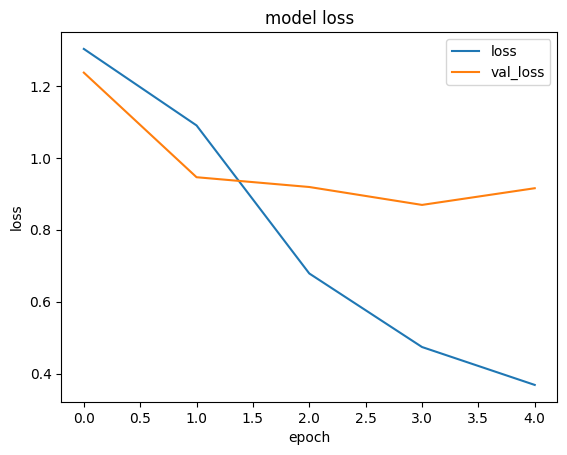

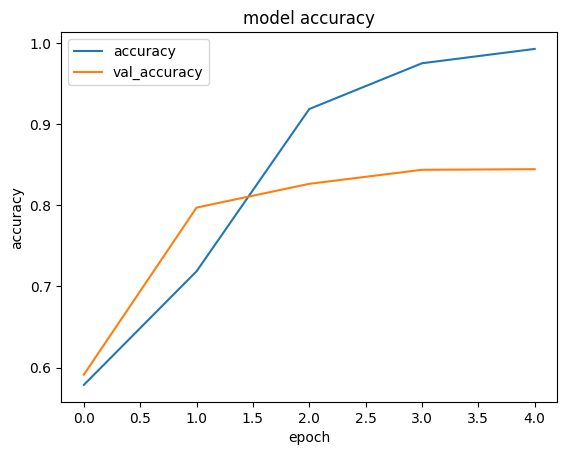

In [24]:
#Visualization
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [25]:
loss_and_metrics=model.evaluate(padded,train_labels,batch_size=256)
print("The train accuracy is: "+str(loss_and_metrics[1]))
loss_and_metrics = model.evaluate(testing_padded,test_labels,batch_size=256)
print("The test accuracy is: "+str(loss_and_metrics[1]))

21/21 [==============================] - 2s 77ms/step - loss: 0.3270 - accuracy: 0.9976
The train accuracy is: 0.9975568652153015
6/6 [==============================] - 0s 70ms/step - loss: 0.9155 - accuracy: 0.8445
The test accuracy is: 0.8444778323173523


# For SVM

In [26]:
pip install spacy


Note: you may need to restart the kernel to use updated packages.


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
# from nltk.corpus import stopwords
from spacy.lang.de.stop_words import STOP_WORDS
from nltk.tokenize import TweetTokenizer
from nltk.stem import SnowballStemmer
# from nltk.stem import *


def tokenize(text): 
    tknzr = TweetTokenizer()
    return tknzr.tokenize(text)

def stem(doc):
    return (stemmer.stem(w) for w in analyzer(doc))


# en_stopwords = set(stopwords.words("english")) 
en_stopwords = list(STOP_WORDS) 

vectorizer=CountVectorizer(analyzer='word',
                           tokenizer=tokenize,
                           lowercase=True,
                           ngram_range=(1,1),
                           stop_words=en_stopwords)


In [28]:
from sklearn.model_selection import StratifiedKFold
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [29]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC



In [30]:
np.random.seed(1)


Pipeline_svm=make_pipeline(vectorizer,SVC(probability=True,kernel='linear',class_weight='balanced'))

grid_svm=GridSearchCV(Pipeline_svm,
                    param_grid = {'svc__C': [0.01, 0.1, 1]}, 
                    cv = kfolds,
                    scoring="roc_auc",
                    verbose=1,   
                    n_jobs=-1)

train_labels_new=train1['sentiment'].values


In [31]:
grid_svm.fit(training_sentences,train_labels_new)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


c:\Users\user\anaconda3\envs\env_python3.9\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(stop_words=['dermaßen',
                                                                    'einigen',
                                                                    'anderem',
                                                                    'ebenso',
                                                                    'denen',
                                                                    'zusammen',
                                                                    'jene',
                                                                    'sehr',
                                                                    'danach',
                                                                    'macht',
                                                                    'allein',
                                                                    'während',
                                                                    'wann',
                                                                    'fünf',
                                                                    'satt',
                                                                    'gut',
                                                                    'dafür',
                                                                    'in',
                                                                    'wollt',
                                                                    'na',
                                                                    'geschweige',
                                                                    'manchen',
                                                                    'dürfen',
                                                                    'von',
                                                                    'muß',
                                                                    'seinem',
                                                                    'drittes',
                                                                    'mochten',
                                                                    'für',
                                                                    'manche', ...],
                                                        tokenizer=<function tokenize at 0x0000027FC1095160>)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            kernel='linear',
                                            probability=True))]),
             n_jobs=-1, param_grid={'svc__C': [0.01, 0.1, 1]},
             scoring='roc_auc', verbose=1)

In [32]:
X_test = test1['sentence'].values
y_test = test1['sentiment'].values
grid_svm.score(X_test,y_test)

0.9367260629041416

In [33]:
grid_svm.best_params_

{'svc__C': 1}

In [34]:
grid_svm.best_score_

0.929212992465582

In [35]:
from sklearn.metrics import make_scorer, accuracy_score,f1_score,roc_curve,auc,roc_auc_score,recall_score,precision_score

In [36]:
def report_results(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    pred = model.predict(X)        

    auc = roc_auc_score(y, pred_proba)
    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred)
    prec = precision_score(y, pred)
    rec = recall_score(y, pred)
    result = {'auc': auc, 'f1': f1, 'acc': acc, 'precision': prec, 'recall': rec}
    return result

In [37]:
report_results(grid_svm.best_estimator_, X_test, y_test)

{'auc': 0.9367306424135846,
 'f1': 0.856663872590109,
 'acc': 0.8715251690458302,
 'precision': 0.8432343234323433,
 'recall': 0.8705281090289608}

In [38]:
def get_roc_curve(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, _ = roc_curve(y, pred_proba)
    return fpr, tpr

In [39]:
roc_svm = get_roc_curve(grid_svm.best_estimator_, X_test, y_test)

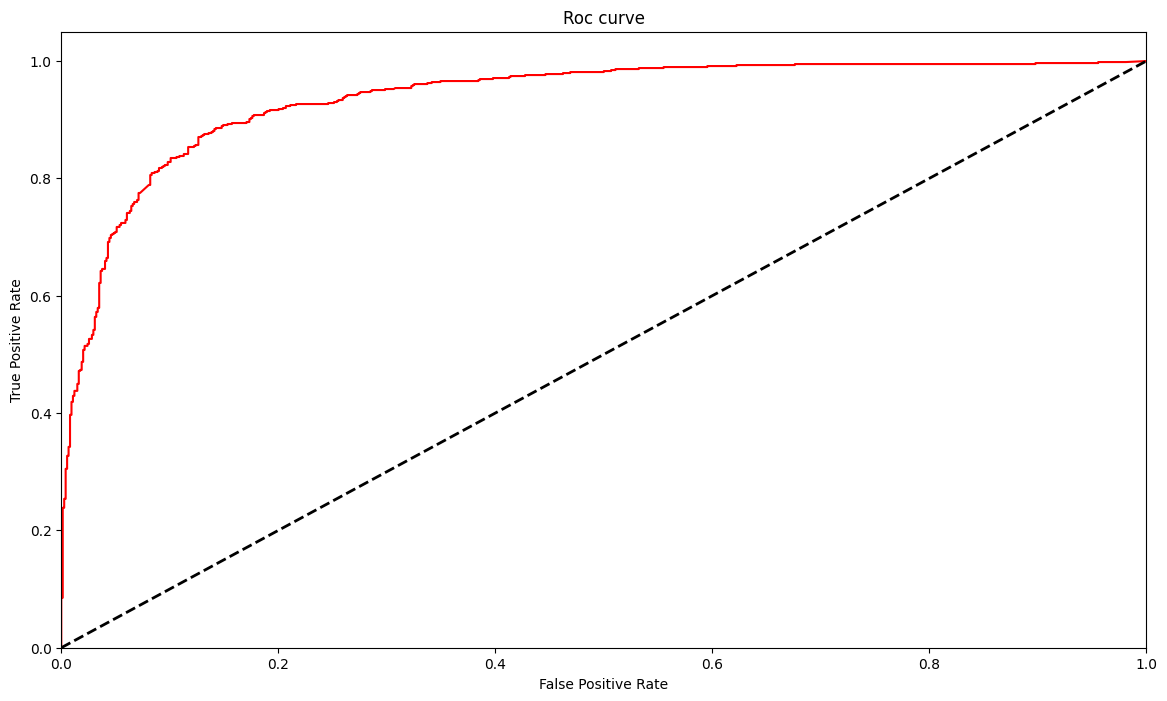

In [40]:
fpr, tpr = roc_svm
plt.figure(figsize=(14,8))
plt.plot(fpr, tpr, color="red")
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Roc curve')
plt.show()

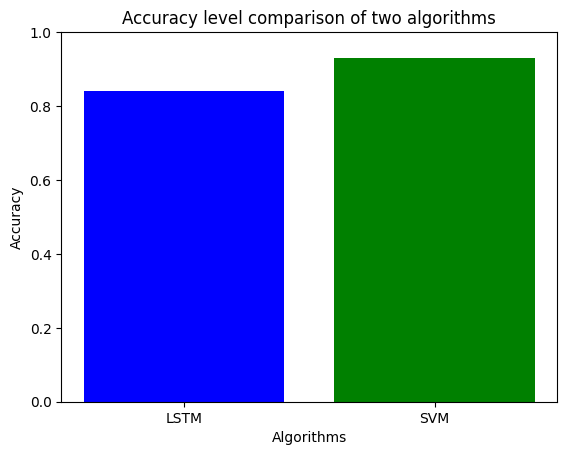

In [41]:
# Accuracy Algorithm comparision 
import matplotlib.pyplot as plt
algorithms=['LSTM','SVM']
accuracy=[0.84,0.93] #accuracy scores for each algorithm

#plotting the bar graph 
fig, ax=plt.subplots()
ax.bar(algorithms,accuracy,color=['b','g'])
ax.set_ylim([0,1])
ax.set_xlabel('Algorithms')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy level comparison of two algorithms')

plt.show()